In [1]:
import pandas as pd
import seaborn as sns
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

# Importing Database

In [2]:
drugs = pd.read_csv("/home/arturcgs/HDD/Documents/mestrado/datasets/lipinski/approved_drugs_final.csv")
drugs = drugs.drop(["ROMol", "Mol_Clean"], axis=1)
drugs = drugs.drop(drugs.columns[drugs.columns.str.contains("follow")], axis=1)
drugs.head()

,active_ingredient_moiety,nda_bla,approval_year,active,DrugBank ID,Drug Groups,SMILES,Name,Drug Type,mw,n_hba,n_hbd,logp,route,tpsa,rb,h_sum
0,troglitazone,NDA,1997,troglitazone,DB00197,approved; investigational; withdrawn,CC1=C(C)C2=C(CCC(C)(COC3=CC=C(CC4SC(=O)NC4=O)C...,Troglitazone,SmallMoleculeDrug,441.160994,6,2,4.37426,oral,84.86,5,8
1,imiquimod,NDA,1997,imiquimod,DB00724,approved; investigational,CC(C)CN1C=NC2=C1C1=C(C=CC=C1)N=C2N,Imiquimod,SmallMoleculeDrug,240.137497,4,1,2.82270,topical,56.73,2,5
2,anagrelide hydrochloride,NDA,1997,anagrelide,DB00261,approved,ClC1=CC=C2N=C3NC(=O)CN3CC2=C1Cl,Anagrelide,SmallMoleculeDrug,254.996617,3,1,1.92630,oral,44.70,0,4
3,nelfinavir mesylate,NDA,1997,nelfinavir,DB00220,approved,[H][C@@]12CCCC[C@]1([H])CN(C[C@@H](O)[C@H](CSC...,Nelfinavir,SmallMoleculeDrug,567.313078,6,4,4.74762,oral,101.90,9,10
4,delavirdine mesylate,NDA,1997,delavirdine,DB00705,approved,CC(C)NC1=C(N=CC=C1)N1CCN(CC1)C(=O)C1=CC2=C(N1)...,Delavirdine,SmallMoleculeDrug,456.194360,6,3,2.71710,oral,110.43,6,9


# aaaaaaaAAA

/home/arturcgs/miniconda3/envs/teachopencadd/lib/python3.8/site-packages/seaborn/distributions.py:2142: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
/home/arturcgs/miniconda3/envs/teachopencadd/lib/python3.8/site-packages/seaborn/distributions.py:2142: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
/home/arturcgs/miniconda3/envs/teachopencadd/lib/python3.8/site-packages/seaborn/distributions.py:2142: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
/home/arturcgs/miniconda3/envs/teachopencadd/lib/python3.8/site-packages/seaborn/distributions.py:2142: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warn

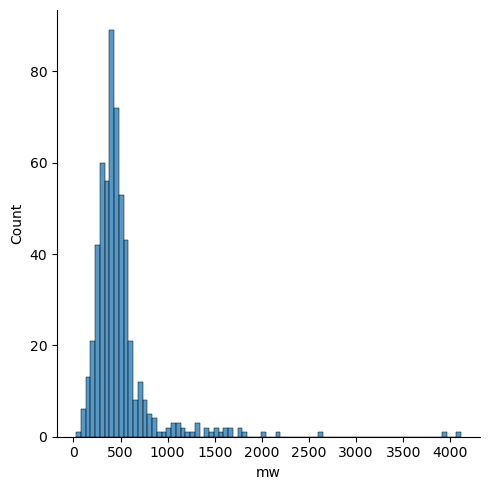

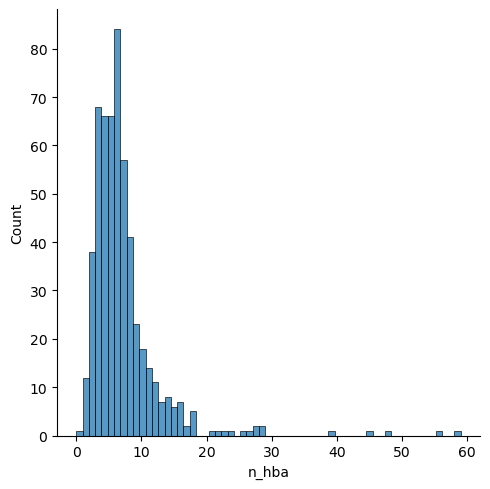

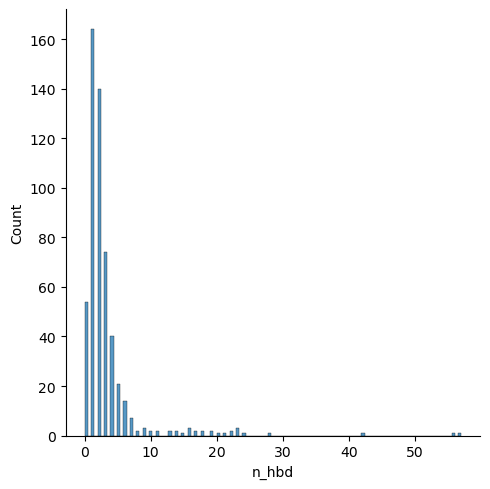

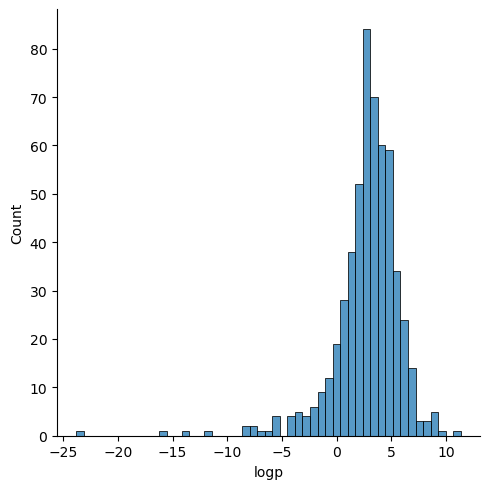

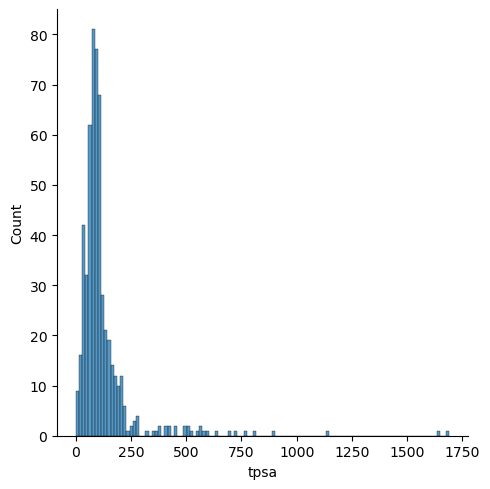

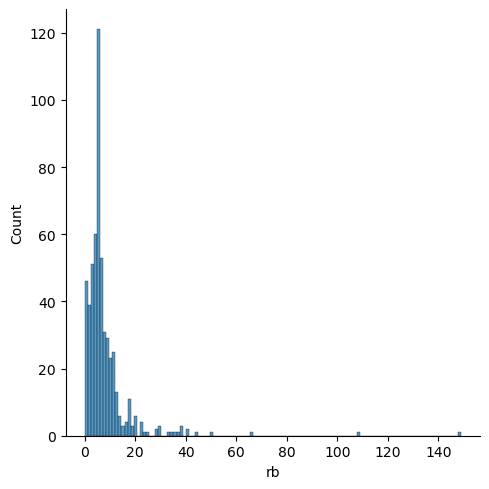

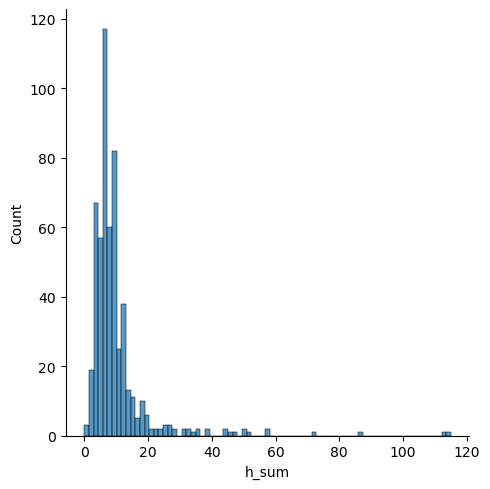

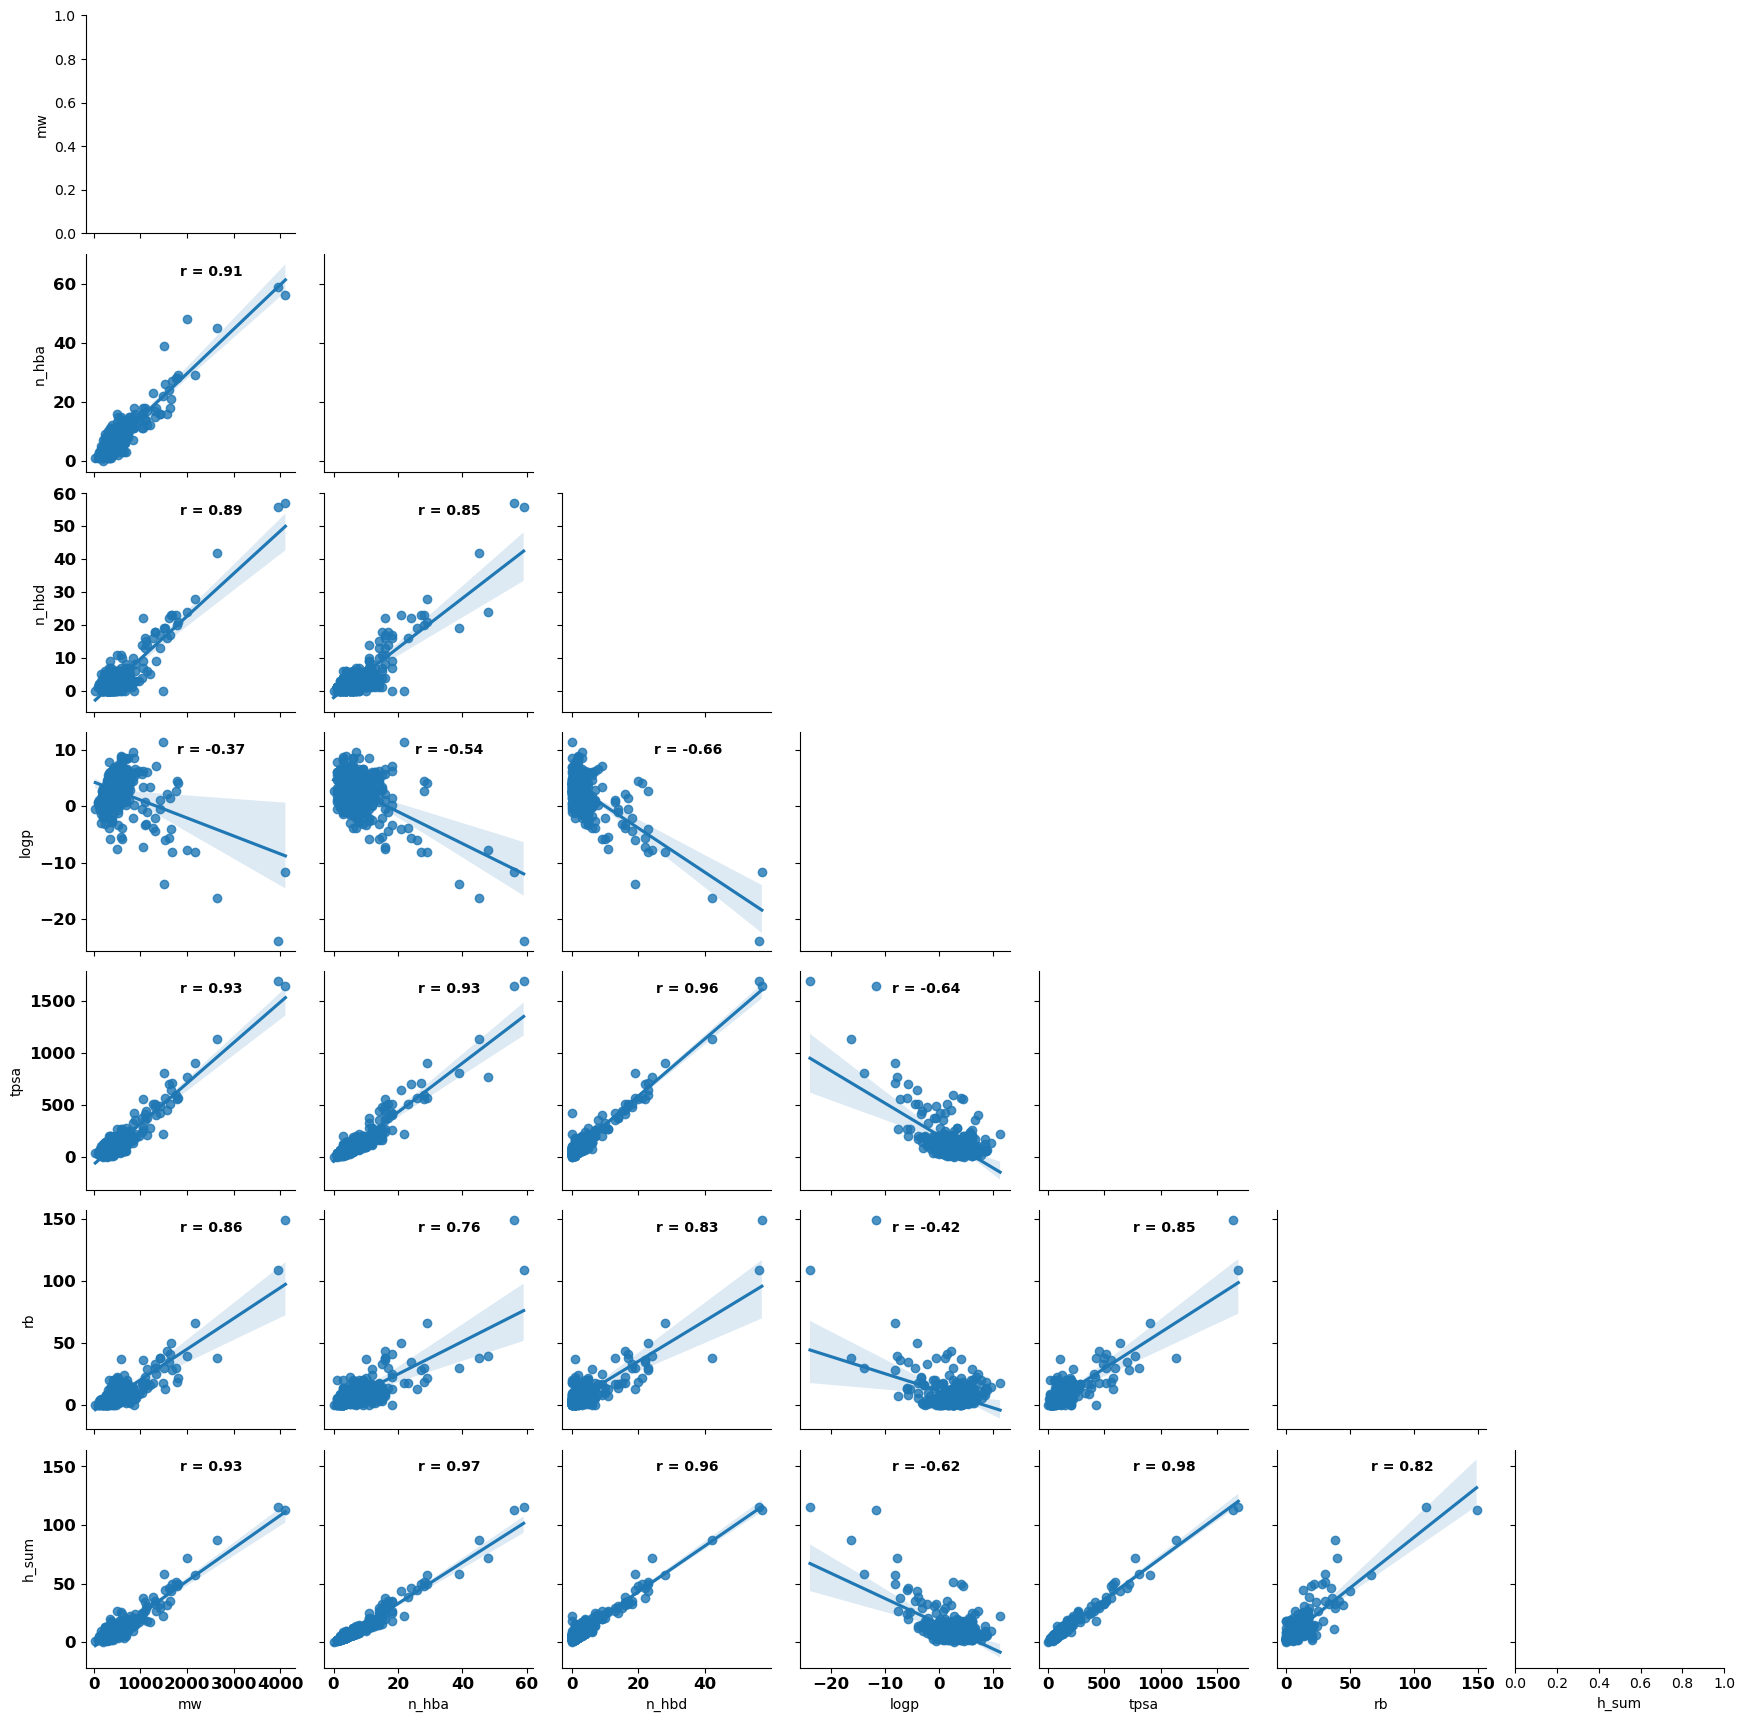

In [3]:
def reg_coef(x,y,label=None,color=None,**kwargs):
    ax = plt.gca()
    r,p = pearsonr(x,y)
    ax.annotate('r = {:.2f}'.format(r), xy=(0.6,0.9), xycoords='axes fraction', ha='center', fontweight=1000)
    

    # bold tick
    plt.setp(ax.get_xticklabels(), fontsize=12, fontweight=627)
    plt.setp(ax.get_yticklabels(), fontsize=12, fontweight=624)
    #ax.set_axis_off()

def hide_axis(x, y, label=None, color=None, **kwargs):
    ax = plt.gca()
    ax.set_axis_off()


g = sns.PairGrid(drugs[["mw", "n_hba", "n_hbd", "logp", "tpsa", "rb", "h_sum"]])
g.map_diag(sns.displot)
g.map_lower(reg_coef)
g.map_lower(sns.regplot)
g.map_upper(hide_axis)
